In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import erf

6dFGS | [6118, 6200]
LAMOST | [1488, 1644]


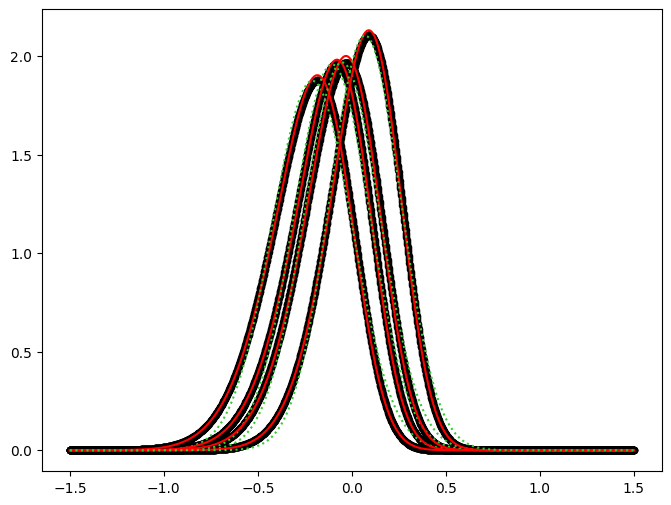

In [19]:
def skew_normal(x, loc, scale, alpha):
    def std_normal(x):
        return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)
    
    def cdf(x):
        return 0.5 * (1 + erf(x / np.sqrt(2)))
    
    return (2 / scale) * std_normal((x - loc) / scale) * cdf(alpha * (x - loc) / scale)

fp_fit = "ALL_COMBINED"
fp_fit_method = 0

# Candidate log-distance ratios
dmin, dmax, nd = -1.5, 1.5, 2001
dbins = np.linspace(dmin, dmax, nd, endpoint=True)

# Differentiate 3 survey colors
colors = ["C0", "C1", "C2"]

fig, ax = plt.subplots(figsize=(8, 6))
for i, survey in enumerate(["6dFGS", "LAMOST"]):
    # Load posterior pdf
    posterior_pdfs = np.load(f"../../artifacts/logdist/smin_setting_1/fp_fit_method_{fp_fit_method}/{survey.lower()}_posterior_{fp_fit.lower()}_fp.npy")

    # Load worst PDFs
    df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_{fp_fit_method}/{survey.lower()}.csv")
    df = df[df[f"logdist_alpha_{fp_fit.lower()}"] < -1.4]
    df_worst = df.sort_values(by=f'logdist_rmse_{fp_fit.lower()}', ascending=False).head(2)
    worst_index = list(df_worst.index)
    print(f"{survey} | {worst_index}")
    logdist = df_worst[f"logdist_{fp_fit.lower()}"].tolist()
    logdist_err = df_worst[f"logdist_err_{fp_fit.lower()}"].tolist()
    loc_ = df_worst[f"logdist_loc_{fp_fit.lower()}"].tolist()
    scale_ = df_worst[f"logdist_scale_{fp_fit.lower()}"].tolist()
    alpha_ = df_worst[f"logdist_alpha_{fp_fit.lower()}"].tolist()

    for j, idx in enumerate(worst_index):
        
        plt.plot(dbins, skew_normal(dbins, loc=loc_[j], scale=scale_[j], alpha=alpha_[j]), c='r')
        plt.plot(dbins, norm.pdf(dbins, loc=logdist[j], scale=logdist_err[j]), c='limegreen', ls=":")
        y = posterior_pdfs[idx]
        ax.scatter(dbins, y, s=20, c='k')

# ax.set_xlim(-0.4, 0.8)

In [147]:
df_worst[[f"logdist_loc_{fp_fit.lower()}", f"logdist_scale_{fp_fit.lower()}", f"logdist_alpha_{fp_fit.lower()}"]].to_numpy()

array([[-0.04243894,  0.23226144, -1.44649154],
       [ 0.24818791,  0.21941103, -1.42588279],
       [ 0.23335677,  0.26338052, -1.65461851]])

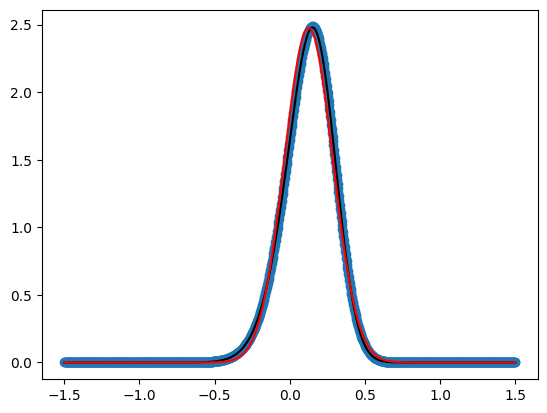

In [131]:
def skew_normal(x, loc, scale, alpha):
    def std_normal(x):
        return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)
    
    def cdf(x):
        return 0.5 * (1 + erf(x / np.sqrt(2)))
    
    return (2 / scale) * std_normal((x - loc) / scale) * cdf(alpha * (x - loc) / scale)


idx = 2588
df = pd.read_csv('../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/6dfgs.csv')
df = df.iloc[idx]

loc_, scale_, alpha_ = df[["logdist_loc_all_combined", "logdist_scale_all_combined", "logdist_alpha_all_combined"]].tolist()

posterior_pdfs = np.load(f"../../artifacts/logdist/smin_setting_1/fp_fit_method_0/6dfgs_posterior_all_combined_fp.npy")
pdf_ = posterior_pdfs[idx]

# Candidate log-distance ratios
dmin, dmax, nd = -1.5, 1.5, 1001
dbins = np.linspace(dmin, dmax, nd, endpoint=True)

plt.scatter(dbins, pdf_)

y = skew_normal(dbins, loc_, scale_, alpha_)
plt.plot(dbins, y, c='k')
plt.plot(dbins, norm.pdf(dbins, loc=df["logdist_mean_all_combined"], scale=df["logdist_err_all_combined"]), c='r')

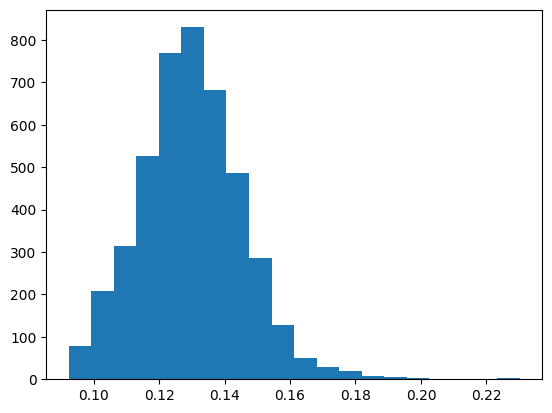

[]

In [31]:
df = pd.read_csv('../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/sdss.csv')

plt.hist(df["logdist_scale_all_combined"], bins=20)
plt.show()

df = df[df["logdist_alpha_all_combined"] < -1.5].sort_values(by="logdist_alpha_all_combined", ascending=False)
list(df.head().index)

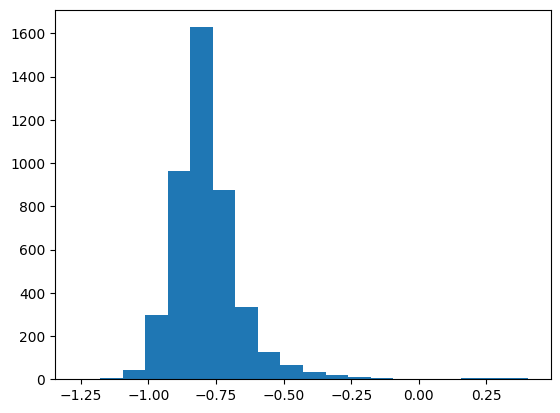

[]

In [32]:
df = pd.read_csv('../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/sdss.csv')

plt.hist(df["logdist_alpha_all_combined"], bins=20)
plt.show()

df = df[df["logdist_alpha_all_combined"] < -1.5].sort_values(by="logdist_alpha_all_combined", ascending=False)
list(df.head().index)

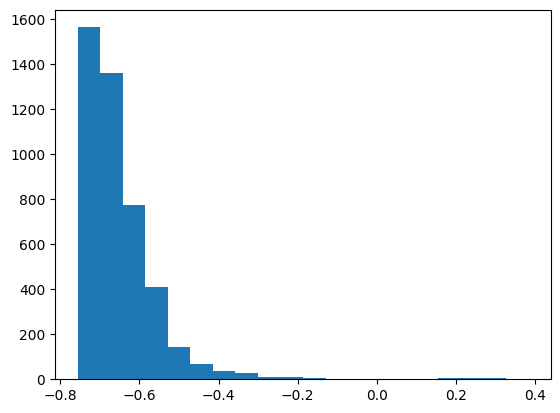

[]

In [33]:
df = pd.read_csv('../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/sdss.csv')

plt.hist(df["logdist_alpha_all_combined"], bins=20)
plt.show()

df = df[df["logdist_alpha_all_combined"] < -1.5].sort_values(by="logdist_alpha_all_combined", ascending=False)
list(df.head().index)

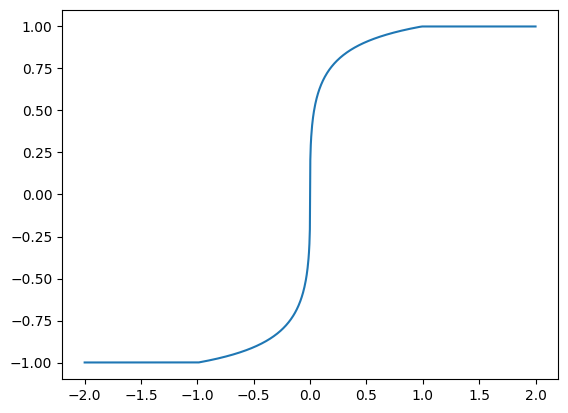

In [93]:
def delta(x):
    x = np.where(x > 0.99, 0.99, x)
    x = np.where(x < -0.99, -0.99, x)

    num_ = np.pi * np.abs(x)**(2/3)
    denom_ = 2 * np.abs(x)**(2/3) + (np.sqrt(2) * (4 - np.pi))**(2/3)
    return np.sign(x) * np.sqrt(num_ / denom_)

x = np.linspace(-2, 2, 1000)
plt.plot(x, delta(x))

In [24]:
df1 = pd.read_csv("../../data/foundation/fp_sample_final/smin_setting_1/fp_fit_method_0/lamost.csv")
df2 = pd.read_csv("../../data/foundation/fp_sample_final/smin_setting_1/fp_fit_method_0/sdss.csv")

df1["es"].median() / df2["es"].median()

4.10785959773336

# Calculate reduced chi squared for the worst PDFs

In [57]:
def skew_normal(x, loc, scale, alpha):
    def std_normal(x):
        return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)
    
    def cdf(x):
        return 0.5 * (1 + erf(x / np.sqrt(2)))
    
    out_ = (2 / scale) * std_normal((x - loc) / scale) * cdf(alpha * (x - loc) / scale) * 0.988
    out_ = np.where(out_ < 1e-15, 1e-15, out_)
    return out_

survey = "6dFGS"
fp_fit = "ALL_COMBINED"
fp_fit_method = 0

# Load posterior pdf
posterior_pdfs = np.load(f"../../artifacts/logdist/smin_setting_1/fp_fit_method_{fp_fit_method}/{survey.lower()}_posterior_{fp_fit.lower()}_fp.npy")

# Load worst PDFs
df = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_{fp_fit_method}/{survey.lower()}.csv")
df_worst = df[df[f"logdist_alpha_{fp_fit.lower()}"] < -1.4]
df_worst = df_worst.sort_values(by=f'logdist_alpha_{fp_fit.lower()}', ascending=True).head(1)

idx = df_worst.index.values[0]

# Candidate log-distance ratios
dmin, dmax, nd = -1.5, 1.5, 2001
dbins = np.linspace(dmin, dmax, nd, endpoint=True)

logdist = df_worst[f"logdist_{fp_fit.lower()}"].tolist()[0]
logdist_err = df_worst[f"logdist_err_{fp_fit.lower()}"].tolist()[0]
loc_ = df_worst[f"logdist_loc_{fp_fit.lower()}"].tolist()[0]
scale_ = df_worst[f"logdist_scale_{fp_fit.lower()}"].tolist()[0]
alpha_ = df_worst[f"logdist_alpha_{fp_fit.lower()}"].tolist()[0]

y_true = posterior_pdfs[idx]
y_normal = norm.pdf(dbins, loc=logdist, scale=logdist_err)
y_skewnormal = skew_normal(dbins, loc=loc_, scale=scale_, alpha=alpha_)

# Calculate chi-squared
N_data = len(y_true)
red_chisq_normal = np.sum((y_true - y_normal)**2 / y_normal) / (N_data - 2 -1)
red_chisq_skewnormal = np.sum((y_true - y_skewnormal)**2 / y_skewnormal) / (N_data - 3 -1)

In [58]:
red_chisq_normal

0.023026181891725173

In [59]:
red_chisq_skewnormal

0.0001294978916840176

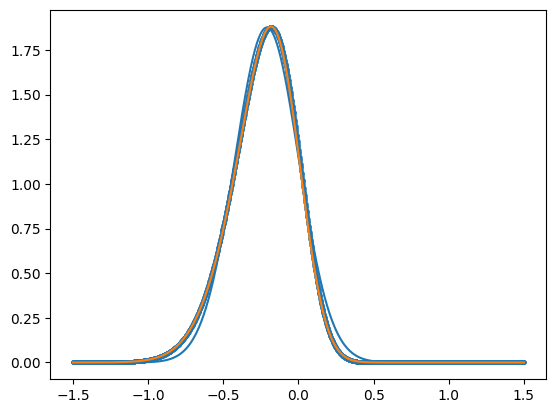

In [62]:
plt.scatter(dbins, y_true, s=5)
plt.plot(dbins, y_normal)
plt.plot(dbins, y_skewnormal)

# Internal Consistency Checks

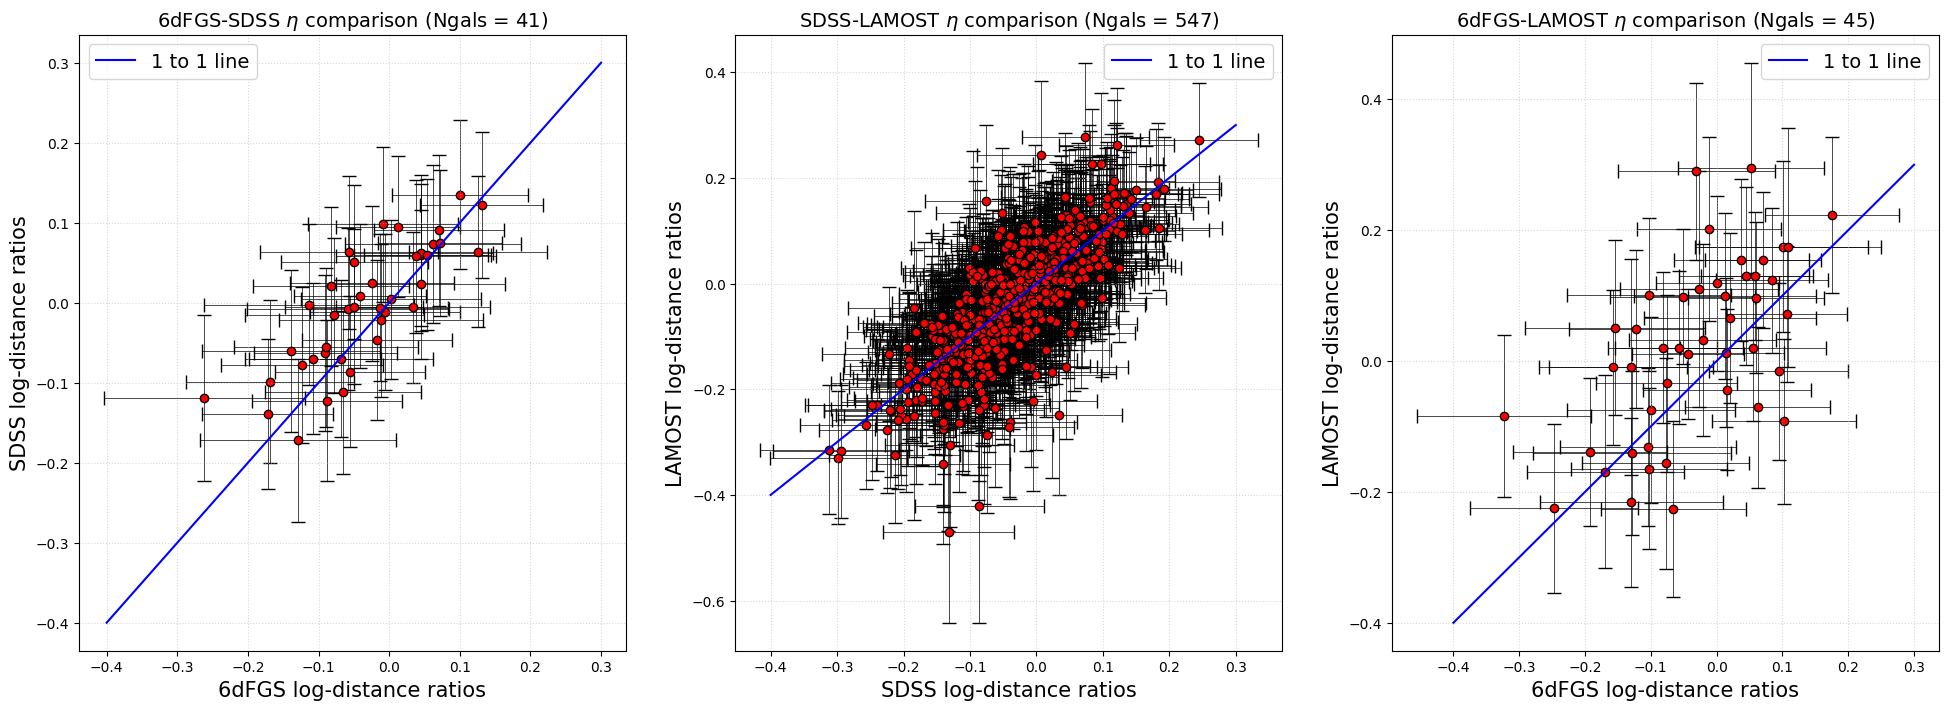

In [65]:
HEIGHT = 8
fig, ax = plt.subplots(ncols=3, figsize=(HEIGHT * 3, HEIGHT))

ALL_COMBOS = [('6dFGS', 'SDSS'), ('SDSS', 'LAMOST'), ('6dFGS', 'LAMOST')]
for i, combo in enumerate(ALL_COMBOS):
    survey1 = combo[0]
    survey2 = combo[1]

    df1 = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey1.lower()}.csv")
    df2 = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey2.lower()}.csv")

    df = df1.merge(df2, on='tmass', how='inner')

    fp_1 = survey1.lower()
    fp_2 = survey2.lower()
    ax[i].errorbar(df[f'logdist_{fp_1}_x'], df[f'logdist_{fp_2}_y'], xerr=df[f'logdist_err_{fp_1}_x'], yerr=df[f'logdist_err_{fp_2}_y'], fmt='o', capsize=5, elinewidth=0.5, ecolor='k', mec='k', mfc='r', zorder=1)
    ax[i].plot([-0.4, 0.3], [-0.4, 0.3], color='blue', label='1 to 1 line', zorder=2)
    ax[i].set_xlabel(f'{survey1} log-distance ratios', size=15)
    ax[i].set_ylabel(f'{survey2} log-distance ratios', size=15)
    ax[i].set_title(fr'{survey1}-{survey2} $\eta$ comparison (Ngals = {len(df)})', fontsize=14)
#     ax[i].set_xlim(-0.54, 0.5)
#     ax[i].set_ylim(-0.54, 0.5)
    ax[i].grid(ls=':', alpha=0.5)
    ax[i].legend(fontsize=14)

plt.show()

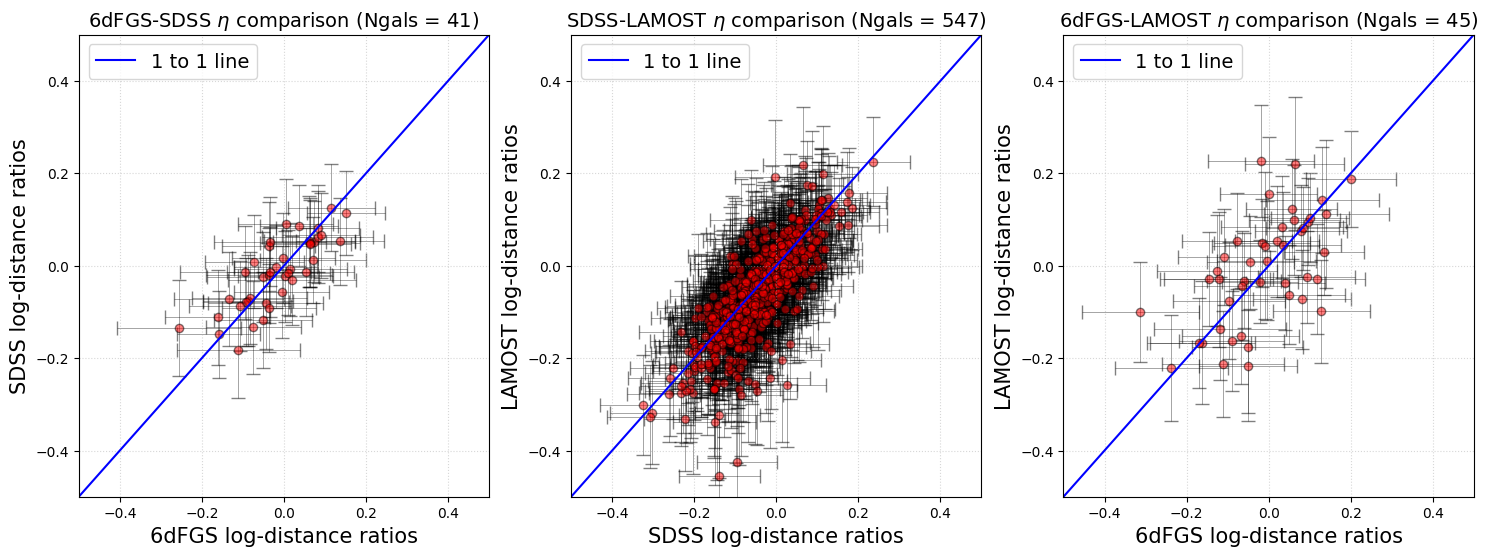

In [73]:
HEIGHT = 6
fig, ax = plt.subplots(ncols=3, figsize=(HEIGHT * 3, HEIGHT))

ALL_COMBOS = [('6dFGS', 'SDSS'), ('SDSS', 'LAMOST'), ('6dFGS', 'LAMOST')]
for i, combo in enumerate(ALL_COMBOS):
    survey1 = combo[0]
    survey2 = combo[1]

    df1 = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey1.lower()}.csv")
    df2 = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey2.lower()}.csv")

    df = df1.merge(df2, on='tmass', how='inner')

    fp_1 = "all_combined" #survey1.lower()
    fp_2 = "all_combined" #survey2.lower()
    ax[i].errorbar(df[f'logdist_{fp_1}_x'], df[f'logdist_{fp_2}_y'], xerr=df[f'logdist_err_{fp_1}_x'], yerr=df[f'logdist_err_{fp_2}_y'], fmt='o', capsize=5, elinewidth=0.5, ecolor='k', mec='k', mfc='r', zorder=1, alpha=0.5)
    ax[i].plot([-0.5, 0.5], [-0.5, 0.5], color='blue', label='1 to 1 line', zorder=2)
    ax[i].set_xlabel(f'{survey1} log-distance ratios', size=15)
    ax[i].set_ylabel(f'{survey2} log-distance ratios', size=15)
    ax[i].set_title(fr'{survey1}-{survey2} $\eta$ comparison (Ngals = {len(df)})', fontsize=14)
#     ax[i].set_xlim(-0.54, 0.5)
#     ax[i].set_ylim(-0.54, 0.5)
    ax[i].grid(ls=':', alpha=0.5)
    ax[i].legend(fontsize=14)
    ax[i].set_xlim(-0.5, 0.5)
    ax[i].set_ylim(-0.5, 0.5)

plt.show()

In [185]:
import numpy as np

df1 = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/sdss.csv")
df2 = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/lamost.csv")
df = df1.merge(df2, on='tmass', how='inner')
df["chisq"] = np.absolute(df["logdist_all_combined_x"] - df["logdist_all_combined_y"]) / np.sqrt(df["logdist_err_all_combined_x"]**2 + df["logdist_err_all_combined_y"]**2)
df = df[df["chisq"] <= 1.0]

ndata = len(df)
x = df["logdist_all_combined_x"].to_numpy()
xerr = df["logdist_err_all_combined_x"].to_numpy()
y = df["logdist_all_combined_y"].to_numpy()
yerr = df["logdist_err_all_combined_y"].to_numpy()
chisq = np.absolute(x - y) / np.sqrt(xerr**2 + yerr**2)

# Some correlated measurements of the x and y values with different errors and correlation coefficients
x_err, y_err, corr_xy = (
    xerr,
    yerr,
    np.zeros(len(df)),
)
data, cov = np.empty((2, ndata)), np.empty((2, 2, ndata))
for i, (x, y, ex, ey, rho_xy) in enumerate(zip(x, y, x_err, y_err, corr_xy)):
    cov[:, :, i] = np.array([[ex ** 2, ex * ey * rho_xy], [ex * ey * rho_xy, ey ** 2]])
    data[:, i] = np.array([x, y])

# data[0, :] = x
# data[1, :] = y

# Some weights between 0.5 and 1.0
weights = 1 / chisq

from hyperfit.linfit import LinFit

hf = LinFit(data, cov, weights=None)

bounds = ((-10.0, 10.0), (-10.0, 10.0), (1.0e-5, 10.0))
print(hf.optimize(bounds, verbose=False))

(array([1.29853683, 0.00199049]), 1.3995583230666782e-05, 1175.9410984937665)


In [189]:
mcmc_samples, mcmc_lnlike = hf.emcee(bounds, verbose=False)

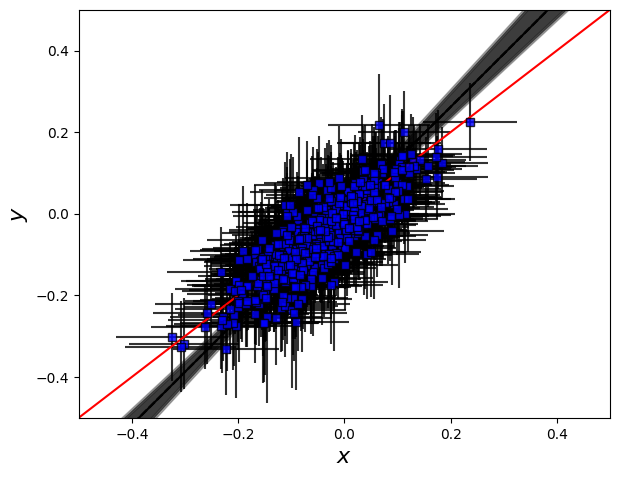

In [188]:
xvals = np.linspace(-0.5, 0.5, 1000)
y_bestfit = np.outer(xvals, hf.coords[0]) + hf.coords[1]
y_chain = np.outer(xvals, mcmc_samples[0]) + mcmc_samples[1]
y_upper = np.outer(xvals, mcmc_samples[0]) + mcmc_samples[1] + mcmc_samples[2]
y_lower = np.outer(xvals, mcmc_samples[0]) + mcmc_samples[1] - mcmc_samples[2]
y_chain_quantiles = np.quantile(y_chain, [0.1587, 0.8414], axis=1)
y_upper_quantiles = np.quantile(y_upper, [0.1587, 0.8414], axis=1)
y_lower_quantiles = np.quantile(y_lower, [0.1587, 0.8414], axis=1)

fig = plt.figure()
ax = fig.add_axes([0.15, 0.13, 0.83, 0.85])
ax.errorbar(data[0], data[1], xerr=x_err, yerr=y_err, c="k", mfc="b", marker="s", ls="None", alpha=0.8)
ax.fill_between(xvals, y_chain_quantiles[0], y_chain_quantiles[1], color="k", alpha=0.5)
ax.fill_between(xvals, y_upper_quantiles[0], y_upper_quantiles[1], color="k", alpha=0.3)
ax.fill_between(xvals, y_lower_quantiles[0], y_lower_quantiles[1], color="k", alpha=0.3)
ax.plot(xvals, y_bestfit, ls="-", c="k")
ax.plot(xvals, y_bestfit + hf.vert_scat, ls="--", c="k")
ax.plot(xvals, y_bestfit - hf.vert_scat, ls="--", c="k")
ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel(r"$y$", fontsize=16)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)

ax.plot([-0.5, 0.5], [-0.5, 0.5], c='r')
plt.show()

/var/folders/50/_r7c0z0x3bl4zx6npn1b1x480000gn/T/ipykernel_1399/493877030.py:63: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[i].scatter(df_rejects["logdist_all_combined_x"], df_rejects["logdist_all_combined_y"], marker="x", c="blue", lw=1., alpha=0.5, zorder=2, edgecolors='k')
/var/folders/50/_r7c0z0x3bl4zx6npn1b1x480000gn/T/ipykernel_1399/493877030.py:63: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[i].scatter(df_rejects["logdist_all_combined_x"], df_rejects["logdist_all_combined_y"], marker="x", c="blue", lw=1., alpha=0.5, zorder=2, edgecolors='k')
/var/folders/50/_r7c0z0x3bl4zx6npn1b1x480000gn/T/ipykernel_1399/493877030.py:63: UserWarning: You passed a edgecolor/edgecolors ('k') for an unf

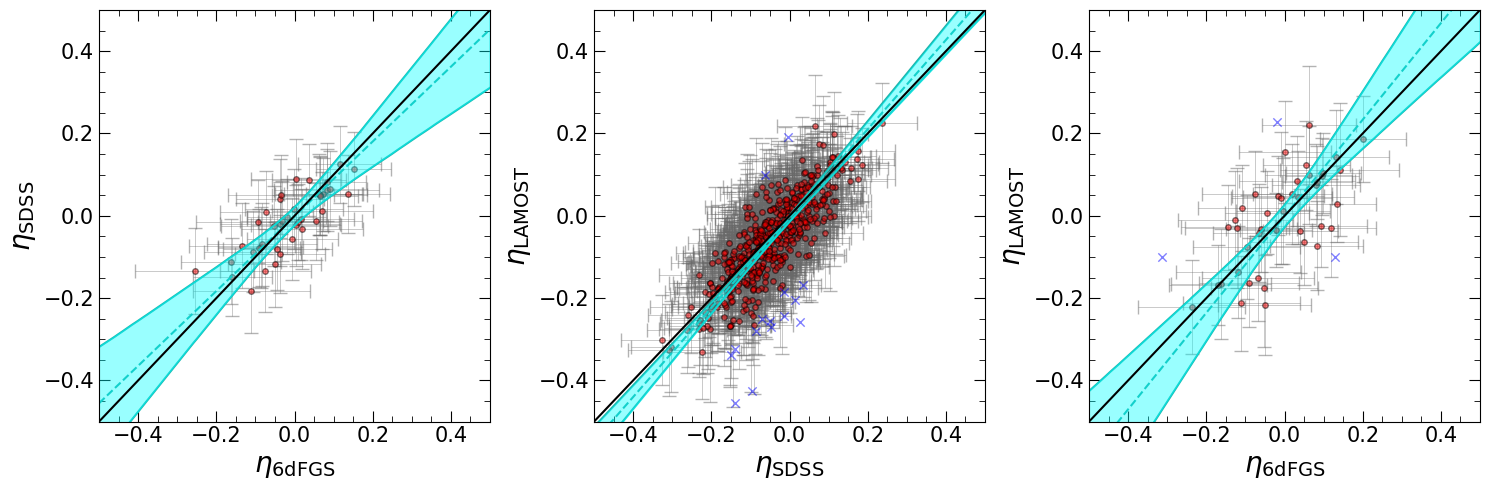

In [298]:
from scipy.odr import ODR, Model, RealData

def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

figure_size = 5
fig, ax = plt.subplots(ncols=3, figsize=(figure_size * 3, figure_size))

ALL_COMBOS = [('6dFGS', 'SDSS'), ('SDSS', 'LAMOST'), ('6dFGS', 'LAMOST')]
for i, combo in enumerate(ALL_COMBOS):
    # Load data
    survey1 = combo[0]
    survey2 = combo[1]

    df1 = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey1.lower()}.csv")
    df2 = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey2.lower()}.csv")
    df = df1.merge(df2, on='tmass', how='inner')
    df["chisq"] = np.absolute(df["logdist_all_combined_x"] - df["logdist_all_combined_y"]) / np.sqrt(df["logdist_err_all_combined_x"]**2 + df["logdist_err_all_combined_y"]**2)
    df_rejects = df[df["chisq"] > 1.0]
    df = df[df["chisq"] <= 1.]

    ndata = len(df)
    x = df["logdist_all_combined_x"].to_numpy()
    xerr = df["logdist_err_all_combined_x"].to_numpy()
    y = df["logdist_all_combined_y"].to_numpy()
    yerr = df["logdist_err_all_combined_y"].to_numpy()
    chisq = np.absolute(x - y) / np.sqrt(xerr**2 + yerr**2)

    # ODR stuff
    linear = Model(f)
    mydata = RealData(x=x, y=y, sx=xerr, sy=yerr)
    myodr = ODR(mydata, linear, beta0=[1.0, 0.0])
    myoutput = myodr.run()
    # myoutput.pprint()
    m_pred, b_pred = myoutput.beta

    # Create MC sample
    n_trial = 10000
    m_trial, b_trial = np.random.multivariate_normal(myoutput.beta, myoutput.cov_beta, n_trial).T

    x_trial = np.linspace(-0.5, 0.5, 1000)
    y_trial = m_trial.reshape(-1, 1) * x_trial + b_trial.reshape(-1, 1)
    y_pred = m_pred * x_trial + b_pred
    y_lower = np.quantile(y_trial, q=0.16, axis=0)
    y_upper = np.quantile(y_trial, q=0.84, axis=0)

    # Actual data + error bars
    ax[i].errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', ms=4, capsize=5, elinewidth=0.5, ecolor='dimgrey', mec='k', mfc='red', alpha=0.5, zorder=1)

    # Prediction + confidence intervals
    ax[i].plot(x_trial, y_pred, c='lightseagreen', ls="--", zorder=2)
    ax[i].plot(x_trial, y_upper, c='lightseagreen', ls="-", zorder=2)
    ax[i].plot(x_trial, y_lower, c='lightseagreen', ls="-", zorder=2)
    ax[i].fill_between(x_trial, y1=y_lower, y2=y_upper, color='cyan', alpha=0.4, zorder=2)

    # Rejects
    ax[i].scatter(df_rejects["logdist_all_combined_x"], df_rejects["logdist_all_combined_y"], marker="x", c="blue", lw=1., alpha=0.5, zorder=2, edgecolors='k')

    # 1-to-1 line
    ax[i].plot([-0.5, 0.5], [-0.5, 0.5], c='k')

    ax[i].set_xlim(-0.5, 0.5)
    ax[i].set_ylim(-0.5, 0.5)
    ax[i].set_xlabel(r"$\eta_\mathrm{survey1}$".replace("survey1", survey1), fontsize=20)
    ax[i].set_ylabel(r"$\eta_\mathrm{survey2}$".replace("survey2", survey2), fontsize=20)

    ax[i].minorticks_on()
    ax[i].tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True,  direction="in") 
    ax[i].tick_params(axis='both', which='both', labelsize=15, direction="in")
    ax[i].tick_params(axis='both', which='major', length=8)
    ax[i].tick_params(axis='both', which='minor', length=4)

    # Add text
    

fig.tight_layout()

In [290]:
z = np.sqrt(myoutput.delta**2 + myoutput.eps**2)
print(np.median(z), "|", np.std(z))

0.03709998104392867 | 0.034756678366112896


In [22]:
# Combine PV sample
df = pd.DataFrame()
for survey in ["6dFGS", "SDSS", "LAMOST"]:
    df_temp = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
    df = pd.concat([df, df_temp])

In [23]:
df["logdist_alpha_all_combined"].median()

-0.725918088693484

In [4]:
df_temp = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/lamost.csv")

df_temp["logdist_all_combined"].median()

-0.03618560377387385

In [14]:
df["logdist_err_all_combined"].median() * np.log(10) * 100

23.75937465856152

In [15]:
0.112 * np.log(10) * 100

25.788953041533315

In [20]:
df = pd.read_csv("../../artifacts/fp_fit/smin_setting_1/fp_fit_method_0/fp_scatter.csv", index_col=0)

df * np.log(10) * 100

,eps_s,eps_photo,sigma_r_int,r_scatter
6dFGS,11.282667,5.963695,18.673965,25.305410
SDSS,1.980223,6.723548,20.423930,21.690352
LAMOST,8.174177,7.851815,22.910722,27.009323
ALL_COMBINED,7.138014,6.677497,20.493007,23.900833


In [19]:
df

,eps_s,eps_photo,sigma_r_int,r_scatter
6dFGS,0.0490,0.0259,0.0811,0.1099
SDSS,0.0086,0.0292,0.0887,0.0942
LAMOST,0.0355,0.0341,0.0995,0.1173
ALL_COMBINED,0.0310,0.0290,0.0890,0.1038
